In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [4]:
image_path = '../output_videos/cropped_img.jpg'
image =cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

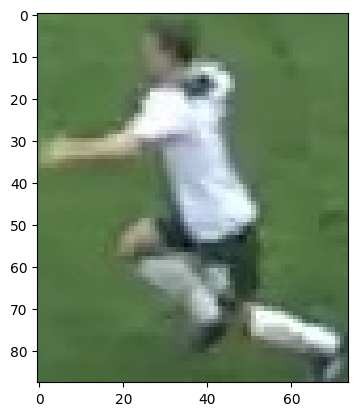

In [6]:
plt.imshow(image)
plt.show()

# Take the top half of the image

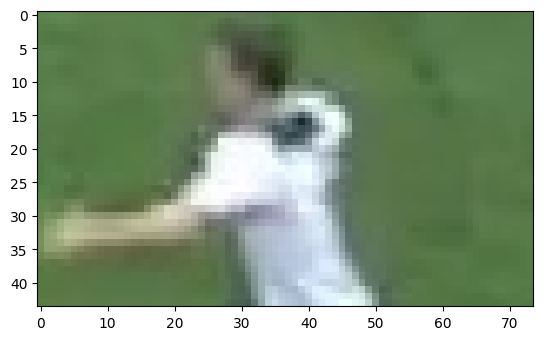

In [8]:
top_half = image[0: int(image.shape[0]/2),:]
plt.imshow(top_half)
plt.show()

# Cluster the image into 2 clusters

/home/isaac-flt/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


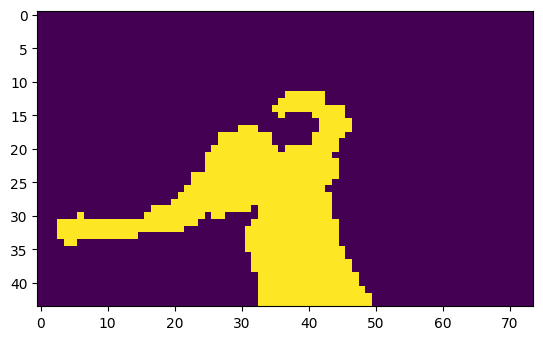

In [12]:
# reshape the image into a 2d array
image_2d = top_half.reshape(-1,3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(image_2d)

# get cluster labels
labels = kmeans.labels_

# reshape the labeks into the original image shape
clustered_image = labels.reshape(top_half.shape[0],top_half.shape[1])

plt.imshow(clustered_image)
plt.show()

In [18]:
corner_clusters = [clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters),key=corner_clusters.count)
player_cluster = 1-non_player_cluster
print(non_player_cluster)

0


In [17]:
kmeans.cluster_centers_[player_cluster]

array([199.01627486, 209.28933092, 212.19168174])